# Aula 4 - Árvores de Regressão


_________________

## Árvores de regressão

Conforme vimos com o KNN, alguns algoritmos de classificação podem ser utilizados como algoritmos de regressão, o que também ocorre para as árvores!

As **árvores de regressão** consistem em funções com valores discretos, lembrando a uma escada, em que cada degrau é o valor de uma folha. [Aqui](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html) há detalhes sobre a classe do sklearn; e [aqui](https://www.youtube.com/watch?v=g9c66TUylZ4) está o StatQuest sobre árvores de regressão!

Como exemplo ilustrativo, vamos considerar um conjunto de dados que nos traga informações sobre a efetividade de um medicamento em função de sua dose. Vamos, graficamente, ilustrar os dados conforme abaixo:

<img src='https://s3-sa-east-1.amazonaws.com/lcpi/800a4332-e709-4ea3-8c24-959c05c8fd65.png' width=500>

Ao utilizar uma árvore de regressão, algoritmo irá obter os valores do target como sendo **a média dos valores de cada folha da árvore final**. 

Visualmente: 

<img src='https://s3-sa-east-1.amazonaws.com/lcpi/64cb4edd-20e1-486a-8fc9-60e60e1485d5.png' width=500>

Para a escolha das melhores divisões: 

- o algoritmo percorre a medida entre cada par de pontos das features; 
- define estes valores como divisões (sequencialmente); 
- para cada divisão experimentada, o algoritmo calcula o MSE (mean squared error);
- a melhor divisão é aquela que apresentar o menor erro!

Visualmente:

<img src='https://s3-sa-east-1.amazonaws.com/lcpi/be58ac8b-5c59-4b9f-be79-e000d060e9e3.png' width=500>

<img src='https://s3-sa-east-1.amazonaws.com/lcpi/1f317afd-6119-41a5-849d-cee038403cf2.png' width=500>

Outro exemplo de árvore de regressão treinada (note a aparência da hipótese -- são "setores", que em uma única dimensão parecem com degraus):

<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--YryIJN_o--/c_imagga_scale,f_auto,fl_progressive,h_900,q_auto,w_1600/https://thepracticaldev.s3.amazonaws.com/i/7oxf0e3cggdj9jayxeig.png" width=600>

Vê-se, portanto, que a ideia de otimização do algoritmo é a mesma que para uma série de outros modelos de regressão: minimizar uma medida de erro das predições com os valores reais observados. A diferença é que, neste caso, estamos lidando com uma estrutura baseada em árvores.
___

Vamos fazer um modelo de árvore de regressão para precificação de casas!

A classe é [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [6]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [52]:
df = pd.read_csv("datasets/house_prices.csv")

In [53]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df = df.select_dtypes(include=[np.number])
df = df.dropna(axis="columns", how="any") #.dropna() - pedir pro pandas pesquisar e jogar fora o que não presta
#axis='columns' - deve eliminar colunas
#axis='index' - deve eliminar linhas
#how='any' - remova se tiver pelo menos um valor nulo

X = df.drop(columns=["Id","SalePrice"]) #.drop() - remova "exatamente isso"
y = df['SalePrice'] #target = coluna 'SalePrice'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #dividir treino e teste

In [45]:
RT = DecisionTreeRegressor() #chama regressor no RT
RT.fit(X_train, y_train) #fitar (treinar) dados - só os de treino de X e y

DecisionTreeRegressor()

In [46]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [47]:
y_pred_train = RT.predict(X_train) #predição de X_train vira y_pred_train

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}") #Coef de Determinação (qual variação de dados o modelo explica)
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}") #Erro médio absoluto (quanto erra na média)
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}") #raiz do erro médio quadrático (erros grandes pesam mais)
#Se RMSE está muito maior que o MAE, o modelo comete erros muito grosseiros (outliers)

# predições de teste
y_pred_test = RT.predict(X_test) #predição de X_test vira y_pred_test

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}") 


Métricas de treino:

R^2: 1.00
MAE: 7.11
RMSE: 171.73

Métricas de teste:

R^2: 0.69
MAE: 28459.96
RMSE: 49031.32


**Será que podemos ter um cenário de overfitting?**

Vemos, acima, uma forte indicação disto, já que o conjunto de teste foi ajustado em praticamente 100%, valor bem superior às predições para os dados de teste. Vamos visualizar a situação a partir de gráficos?

In [48]:
import matplotlib.pyplot as plt

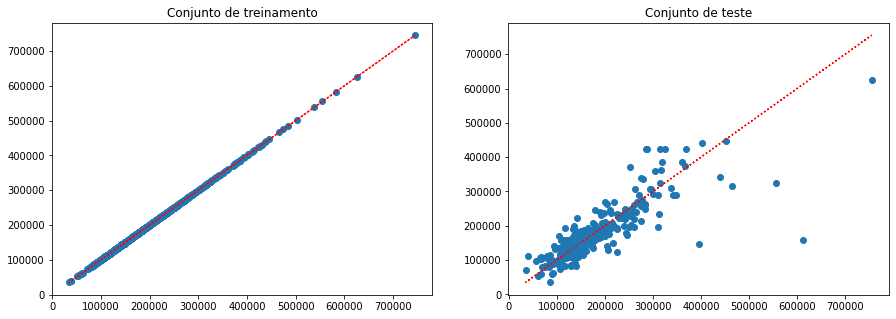

In [49]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].scatter(y_train, y_pred_train) #dispersão
ax[0].set_title("Conjunto de treinamento")
ax[0].plot(np.zeros(len(y_train)) + y_train, np.zeros(len(y_train)) + y_train, ':r')
#ou ax[0].plot(y_train, y_train, ':r')

ax[1].scatter(y_test, y_pred_test)
ax[1].set_title("Conjunto de teste")
ax[1].plot(np.zeros(len(y_test)) + y_test, np.zeros(len(y_test)) + y_test, ':r')
#ou ax[0].plot(y_test, y_test, ':r')

Vamos testar utilizar outros hiperparâmetros do modelo?

Vamos considerar a terceira melhor combinação...

In [50]:
RT = DecisionTreeRegressor(max_depth = 6) #define profundidade máxima
RT.fit(X_train, y_train) #fita dados de treino

y_pred_train = RT.predict(X_train) #segue conforme anterior

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = RT.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}") 


Métricas de treino:

R^2: 0.91
MAE: 17666.57
RMSE: 23429.84

Métricas de teste:

R^2: 0.71
MAE: 26846.61
RMSE: 47036.67


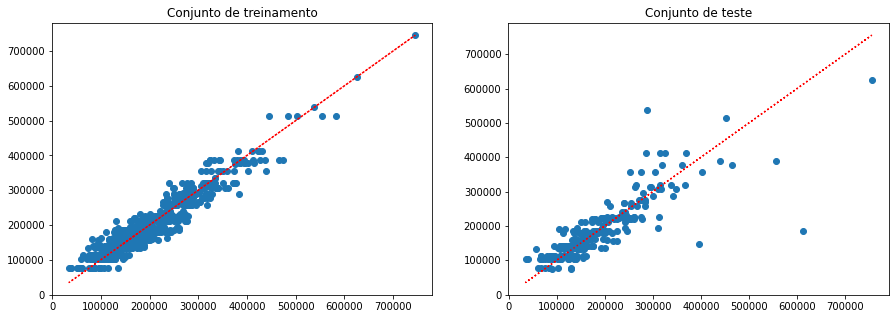

In [51]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].scatter(y_train, y_pred_train)
ax[0].set_title("Conjunto de treinamento")
ax[0].plot(np.zeros(len(y_train)) + y_train, np.zeros(len(y_train)) + y_train, ':r')

ax[1].scatter(y_test, y_pred_test)
ax[1].set_title("Conjunto de teste")
ax[1].plot(np.zeros(len(y_test)) + y_test, np.zeros(len(y_test)) + y_test, ':r');

Com a simples alteração do máximo de profundidade para a árvore, que, como já vimos na aula passada, pode impactar fortemente no sobreajuste deste tipo de modelo, já obtivemos uma situação mais satisfatória no comportamento das previsões entre treinamento e teste!

Em próximas aulas, iremos estudar melhor sobre a otimização de hiperparâmetros dos modelos.
___

#### Prós e Contras - Árvores

Prós: <br>
        * Capaz de lidar com variáveis categóricas e contínuas <br>
        * Geram regras de fácil compreensão para o negócio <br>
        * Não necessita de normalização dos dados nem da escala ([Normalização x Escala](https://kharshit.github.io/blog/2018/03/23/scaling-vs-normalization))  <br>
        * Pode capturar relações não lineares <br>
        * Traz uma ideia da importância de cada feature<br>
        * Modelo não paramétrico (non-parametric: Non-Parametric method is defined as the method in which there are no assumptions about the spatial distribution and the classifier structure) <br>
        * Pouco sensível a outliers

Contras: <br>
        * Pode ser instável com pequenas mudanças nos dados - alta variância (pode ser corrigido com métodos de bagging e boosting) <br>
        * Datasets desbalanceados podem gerar um viés (bias) <br>
        * Por vezes demora mais para ser treinado que outros modelos <br>
        * Não é muito bom em prever valores contínuos (regressão) <br>
        * Precisa de mais tempo de treino conforme aumenta o número de features <br>
        * Features contínuas geram aumento do tempo de treino <br>
        * Tende ao Overfitting (As you know, a decision tree generally needs overfitting of data. In the overfitting problem, there is a very high variance in output which leads to many errors in the final estimation and can show highly inaccuracy in the output. Achieve zero bias (overfitting), which leads to high variance.)

<br>
https://www.educba.com/decision-tree-advantages-and-disadvantages/


### Como superar esses problemas?
Random Forest